In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pandas as pd
import re

In [3]:
def read_and_filter(filename):
    with open(filename, 'rt') as f:
        text = f.read()

    text = re.sub('\n\n+', '\n', text)
    text = re.sub('(?<=\w)\s*\n(?=\w)', ' ', text)
    text = text.replace('  ', ' ')
    text = text.replace('', '')
    return text

In [4]:
text = read_and_filter('../data/external/constitucion_chile_2022/borrador.txt')
print(text[0:2500])

 
• Este documento es un consolidado que reúne las normas aprobadas por el Pleno de la Convención Constitucional, ordenadas por comisión. La relación de números de los artículos obedece a lo dispuesto en los respectivos informes y no es el orden definitivo, ya que ese proceso deberá ser realizado por la Comisión de Armonización 
(Actualizado el 14.05.22). 
 
CONSOLIDADO NORMAS APROBADAS PARA LA PROPUESTA CONSTITUCIONAL POR EL PLENO DE LA CONVENCIÓN CAPÍTULO (COM 1) 
DE LA DEMOCRACIA 1.- Artículo 2°.- Democracia paritaria. El Estado reconoce y promueve una sociedad en la que mujeres, hombres, diversidades y disidencias sexogenéricas participen en condiciones de igualdad sustantiva, reconociendo que su representación efectiva en el conjunto del proceso democrático es un principio y condición mínima para el ejercicio pleno y sustantivo de la democracia y la ciudadanía. 
Todos los órganos colegiados del Estado, los órganos autónomos constitucionales y los órganos superiores y directivos de

In [5]:
prev = read_and_filter('../data/external/constitucion_chile_2022/actual.txt')
print(prev[0:2500])

   FIJA EL TEXTO REFUNDIDO, COORDINADO Y SISTEMATIZADO DE LA CONSTITUCIÓN POLÍTICA DE LA REPÚBLICA DE CHILE
     Núm. 100.- Santiago, 17 de septiembre de 2005.-
  Visto: En uso de las facultades que me confiere el artículo 2° de la Ley Nº 20.050, y teniendo presente lo dispuesto en el artículo 32 N°8 de la Constitución Política de 1980,
     Decreto:
     Fíjase el siguiente texto refundido, coordinado y sistematizado de la Constitución Política de la República:
  Capítulo I
  BASES DE LA INSTITUCIONALIDAD
  Artículo 1°.- Las personas nacen libres e iguales en dignidad y derechos.
  La familia es el núcleo fundamental de la sociedad.
  El Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.
  El Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que per

In [6]:
len(text) / len(prev) * 100

109.31976379771055

In [7]:
from gensim.utils import tokenize
from cytoolz import frequencies

prev_tokens = frequencies(tokenize(prev.replace('mente', ''), lowercase=True, deacc=False))
prev_tokens

{'fija': 33,
 'el': 1585,
 'texto': 72,
 'refundido': 53,
 'coordinado': 52,
 'y': 1250,
 'sistematizado': 52,
 'de': 3791,
 'la': 2265,
 'constitución': 123,
 'política': 18,
 'república': 200,
 'chile': 22,
 'núm': 1,
 'santiago': 3,
 'septiembre': 3,
 'visto': 1,
 'en': 1425,
 'uso': 13,
 'las': 863,
 'facultades': 10,
 'que': 1165,
 'me': 1,
 'confiere': 4,
 'artículo': 343,
 'ley': 462,
 'nº': 106,
 'teniendo': 1,
 'presente': 43,
 'lo': 223,
 'dispuesto': 66,
 'n': 30,
 'decreto': 95,
 'fíjase': 1,
 'siguiente': 32,
 'capítulo': 22,
 'i': 8,
 'bases': 8,
 'institucionalidad': 2,
 'personas': 66,
 'nacen': 1,
 'libres': 1,
 'e': 50,
 'iguales': 4,
 'dignidad': 2,
 'derechos': 33,
 'familia': 3,
 'es': 25,
 'núcleo': 1,
 'fundamental': 2,
 'sociedad': 12,
 'estado': 129,
 'reconoce': 4,
 'ampara': 1,
 'a': 996,
 'los': 1092,
 'grupos': 7,
 'intermedios': 4,
 'través': 17,
 'cuales': 14,
 'se': 531,
 'organiza': 1,
 'estructura': 3,
 'les': 24,
 'garantiza': 3,
 'adecuada': 3,
 'aut

In [8]:
next_tokens = frequencies(tokenize(text.replace('mente', ''), lowercase=True, deacc=False))
next_tokens

{'este': 75,
 'documento': 3,
 'es': 106,
 'un': 217,
 'consolidado': 2,
 'que': 881,
 'reúne': 1,
 'las': 1189,
 'normas': 26,
 'aprobadas': 7,
 'por': 513,
 'el': 1387,
 'pleno': 43,
 'de': 3751,
 'la': 2806,
 'convención': 3,
 'constitucional': 61,
 'ordenadas': 1,
 'comisión': 22,
 'relación': 14,
 'números': 2,
 'los': 1112,
 'artículos': 1,
 'obedece': 1,
 'a': 969,
 'lo': 129,
 'dispuesto': 25,
 'en': 1152,
 'respectivos': 8,
 'informes': 4,
 'y': 2416,
 'no': 192,
 'orden': 12,
 'definitivo': 2,
 'ya': 7,
 'ese': 8,
 'proceso': 26,
 'deberá': 119,
 'ser': 128,
 'realizado': 3,
 'armonización': 1,
 'actualizado': 1,
 'para': 347,
 'propuesta': 17,
 'capítulo': 20,
 'com': 8,
 'democracia': 25,
 'artículo': 538,
 'paritaria': 9,
 'estado': 396,
 'reconoce': 36,
 'promueve': 8,
 'una': 203,
 'sociedad': 18,
 'mujeres': 12,
 'hombres': 1,
 'diversidades': 6,
 'disidencias': 7,
 'sexogenéricas': 4,
 'participen': 1,
 'condiciones': 47,
 'igualdad': 32,
 'sustantiva': 12,
 'reconocie

In [9]:
len(prev_tokens), len(next_tokens)

(4078, 4556)

In [10]:
sum(prev_tokens.values()), sum(next_tokens.values())

(46318, 48436)

In [11]:
from cytoolz import keyfilter

with open("../data/external/stopwords-es.txt", "rt") as f:
    stopwords = set(f.read().split("\n"))

stopwords.update(
    [
        "artículo",
        "capítulo",
        "n°", '°'
        "inciso",
        "dicha",
        "año",
        "refiere",
        "ley",
        "orgánica",
        "plazo",
        "siguientes",
        "siguiente", 'inciso', 'número', 'efecto', 'fecha', 'años', 'procederá', 'mayo', 'dichas', 'formas',
        "incisos", 'deberán', 'deber', 'º', 'nº', 'ámbito', 'ámbitos', 'áreas', 'velar', 'ad', 'única', 'únicas', 'único', 'útiles', 'constitución', 'constitucional', 'deberá', 'determinará',
    ]
)

filtered_prev_tokens = keyfilter(lambda x: not x.lower() in stopwords, prev_tokens)
filtered_next_tokens = keyfilter(lambda x: not x.lower() in stopwords, next_tokens)


In [12]:
freq_table = (
    pd.DataFrame(filtered_prev_tokens.items(), columns=["word", "freq_prev"])
    .set_index("word")
    .join(
        pd.DataFrame(
            filtered_next_tokens.items(), columns=["word", "freq_next"]
        ).set_index("word"),
        how="outer",
    )
    .fillna(0)
)

freq_table


freq_prev  freq_next
word                                
abandono              1.0        2.0
abarca                0.0        1.0
abastecimiento        1.0        2.0
abierta               1.0        3.0
abierto               1.0        4.0
...                   ...        ...
óptima                0.0        1.0
óptimas               0.0        1.0
órdenes               8.0        6.0
órgano               10.0       35.0
órganos              18.0       66.0

[5698 rows x 2 columns]

In [13]:
import numpy as np
from aves.features.utils import normalize_columns, normalize_rows

table_n = freq_table.sum(axis=1)
freq_table = freq_table.pipe(normalize_rows)
freq_table["tendency"] = freq_table["freq_next"] - freq_table["freq_prev"]
freq_table["n"] = table_n
freq_table.sort_values("n")
freq_table


freq_prev  freq_next  tendency     n
word                                                
abandono         0.333333   0.666667  0.333333   3.0
abarca           0.000000   1.000000  1.000000   1.0
abastecimiento   0.333333   0.666667  0.333333   3.0
abierta          0.250000   0.750000  0.500000   4.0
abierto          0.200000   0.800000  0.600000   5.0
...                   ...        ...       ...   ...
óptima           0.000000   1.000000  1.000000   1.0
óptimas          0.000000   1.000000  1.000000   1.0
órdenes          0.571429   0.428571 -0.142857  14.0
órgano           0.222222   0.777778  0.555556  45.0
órganos          0.214286   0.785714  0.571429  84.0

[5698 rows x 4 columns]

<AxesSubplot:ylabel='Frequency'>

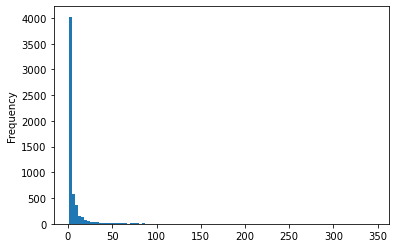

In [14]:
freq_table['n'].plot(kind='hist', bins=100)

In [15]:
freq_table.sort_values('n').tail(15)

freq_prev  freq_next  tendency      n
word                                             
funciones    0.493750   0.506250  0.012500  160.0
cargo        0.515528   0.484472 -0.031056  161.0
electoral    0.817143   0.182857 -0.634286  175.0
forma        0.477273   0.522727  0.045455  176.0
diputados    0.427778   0.572222  0.144444  180.0
congreso     0.375000   0.625000  0.250000  192.0
caso         0.651376   0.348624 -0.302752  218.0
personas     0.298643   0.701357  0.402715  221.0
nacional     0.560000   0.440000 -0.120000  225.0
regional     0.379310   0.620690  0.241379  232.0
derechos     0.136364   0.863636  0.727273  242.0
ejercicio    0.437984   0.562016  0.124031  258.0
presidente   0.649842   0.350158 -0.299685  317.0
república    0.628931   0.371069 -0.257862  318.0
derecho      0.257971   0.742029  0.484058  345.0

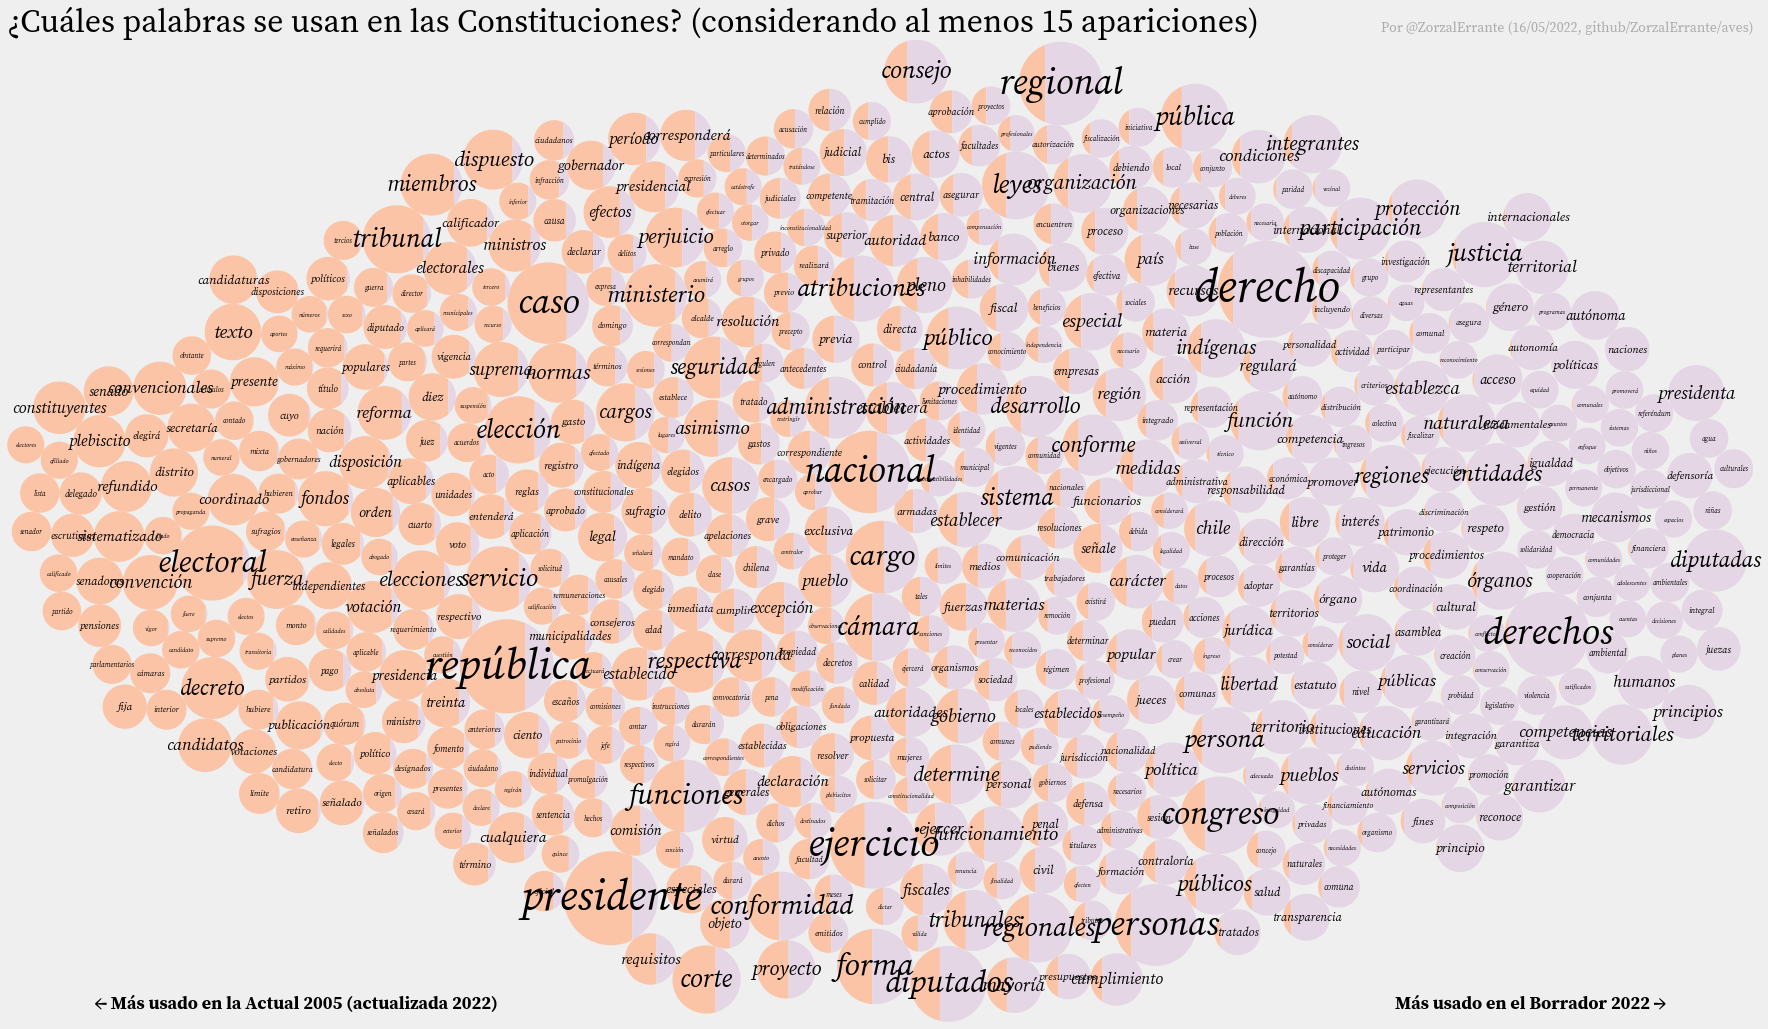

In [16]:
import matplotlib.pyplot as plt
from aves.visualization.tables import bubble_plot

fig, ax = plt.subplots(figsize=(24 * 1.2, 12 * 1.2))

left_color, right_color = ['#fbc4a6', '#e5d6e5']

bubble_plot(
    ax,
    freq_table[freq_table["n"] >= 15].reset_index().sort_values("n", ascending=False),
    "tendency",
    "n",
    label_column="word",
    palette="cool",
    dual=True,
    dual_left_color=left_color,
    dual_right_color=right_color,
    max_label_size=46,
    min_label_size=0,
    starting_y_range=3,
    margin=5,
    x_position_scaling=320,
    fontname="Source Serif Pro",
    fontstyle="italic",
)

ax.set_title(
    "¿Cuáles palabras se usan en las Constituciones? (considerando al menos 15 apariciones)",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=32,
)
ax.set_title(
    "Por @ZorzalErrante (16/05/2022, github/ZorzalErrante/aves)",
    loc="right",
    fontname="Source Serif Pro",
    fontsize=14,
    color="#abacab",
)
ax.set_axis_off()

ax.annotate(
    "Más usado en el Borrador 2022 →",
    (0.95, 0.01),
    xycoords="axes fraction",
    ha="right",
    va="bottom",
    fontsize=18,
    fontname="Source Serif Pro",
    fontweight="bold",
    color="black",
)
ax.annotate(
    "← Más usado en la Actual 2005 (actualizada 2022)",
    (0.05, 0.01),
    xycoords="axes fraction",
    ha="left",
    va="bottom",
    fontsize=18,
    fontname="Source Serif Pro",
    fontweight="bold",
    color="black",
)


fig.set_facecolor("#efefef")
fig.tight_layout()
fig.savefig('bubble_cloud_constitucional.png', dpi=150, bbox_inches='tight')

In [17]:
non_freq_words = freq_table[freq_table['n'] < 15].pipe(lambda x: x.mul(x['n'], axis='index')).drop(['tendency', 'n'], axis=1)
non_freq_words

freq_prev  freq_next
word                                
abandono              1.0        2.0
abarca                0.0        1.0
abastecimiento        1.0        2.0
abierta               1.0        3.0
abierto               1.0        4.0
...                   ...        ...
ñuble                 2.0        0.0
ó                     3.0        0.0
óptima                0.0        1.0
óptimas               0.0        1.0
órdenes               8.0        6.0

[5109 rows x 2 columns]

In [18]:
from aves.visualization.text import draw_wordcloud

In [19]:
from matplotlib.font_manager import FontProperties

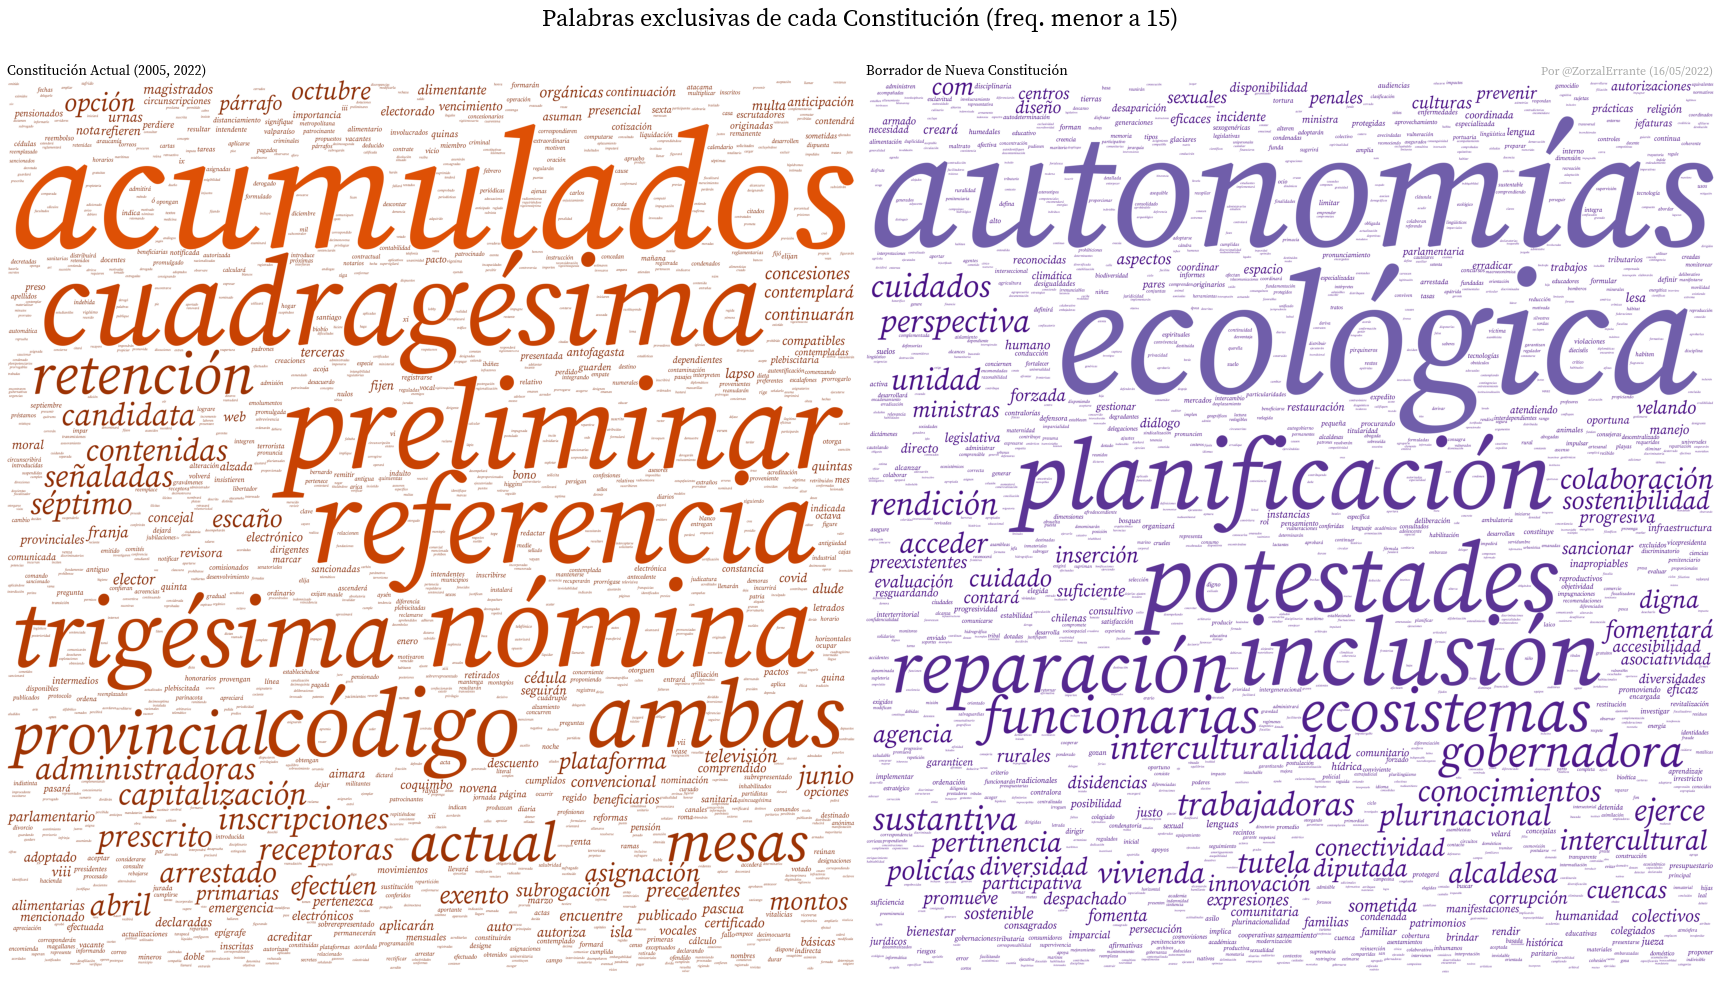

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16 * 1.5, 9 * 1.5))
axes = axes.flatten()

axes[0].set_title(
    "Constitución Actual (2005, 2022)",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=14,
)
axes[1].set_title(
    "Borrador de Nueva Constitución",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=14,
)

axes[1].set_title(
    "Por @ZorzalErrante (16/05/2022)",
    loc="right",
    fontname="Source Serif Pro",
    fontsize=12,
    color="#abacab",
)
axes[0].set_axis_off()
axes[1].set_axis_off()

fig.suptitle(
    "Palabras exclusivas de cada Constitución (freq. menor a 15)",
    fontname="Source Serif Pro",
    fontsize=24,
    y=1.01
)

fig.tight_layout()

draw_wordcloud(
    axes[0],
    non_freq_words[non_freq_words["freq_next"] == 0]["freq_prev"].to_dict(),
    fontname=FontProperties(family="Source Serif Pro", style="italic"),
    cmap="Oranges_r",
    max_words=1500,
    relative_scaling=0.4,
)
draw_wordcloud(
    axes[1],
    non_freq_words[non_freq_words["freq_prev"] == 0]["freq_next"].to_dict(),
    fontname=FontProperties(family="Source Serif Pro", style="italic"),
    cmap="Purples_r",
    max_words=1500,
    relative_scaling=0.4,
)

fig.set_facecolor("white")
fig.savefig("word_cloud_constitucional.png", dpi=150, bbox_inches="tight")


In [98]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('../data/external/SUC/embeddings-l-model.vec', limit=100000)

In [99]:
model.most_similar('chile')

[('chilena', 0.7510282397270203),
 ('bolivia', 0.7396069169044495),
 ('argentina', 0.7372022867202759),
 ('chileno', 0.7328869700431824),
 ('valparaíso', 0.7163181304931641),
 ('antofagasta', 0.7149254679679871),
 ('perú', 0.7068778872489929),
 ('ecuador', 0.7008522152900696),
 ('coquimbo', 0.6886277198791504),
 ('talca', 0.6781579256057739)]

In [100]:
model.get_vector('chile')

array([-1.3527e-01, -6.0242e-02,  8.5268e-02, -4.2575e-01,  1.7024e-01,
       -1.3394e-01,  2.2051e-01,  2.3477e-01, -9.6419e-02, -3.7508e-01,
       -2.7630e-01,  3.7468e-01, -2.2590e-02, -3.9733e-01, -1.4961e-03,
        1.4847e-01, -1.3382e-01,  1.1267e-02,  1.4115e-01, -3.4780e-01,
       -9.1534e-02,  3.5300e-01, -2.1072e-01, -1.7912e-01, -3.1440e-01,
        1.0803e-01,  3.8448e-01,  3.4037e-01, -3.8266e-01,  3.0840e-01,
       -1.7285e-01,  5.5447e-02, -6.9741e-02,  1.0933e-01,  2.6570e-01,
       -3.2142e-03, -4.0988e-01,  1.5294e-01, -3.5732e-01, -1.4395e-01,
       -7.0704e-02,  1.1932e-01,  5.6021e-02, -5.3776e-01, -6.2461e-01,
       -1.4389e-01,  3.1190e-01, -1.5600e-01,  2.8145e-01, -1.6762e-01,
        3.3591e-01, -5.7117e-01, -6.2980e-02, -1.3729e-01,  9.1251e-02,
        1.2341e-01, -2.4211e-01,  2.5406e-02,  1.7031e-01,  2.2495e-01,
       -2.7676e-02,  2.7510e-02, -9.0400e-02,  1.5116e-01, -2.9838e-01,
        3.7293e-02,  1.3478e-01, -1.1015e-01, -1.8851e-01,  4.57

In [101]:
model.has_index_for('chile'), model.has_index_for('chuchunco_city')

(True, False)

In [102]:
valid_words = freq_table.index.map(model.has_index_for)
valid_words.value_counts()


True     5225
False     473
Name: word, dtype: int64

In [103]:
freq_table[valid_words]

freq_prev  freq_next  tendency     n
word                                                
abandono         0.333333   0.666667  0.333333   3.0
abarca           0.000000   1.000000  1.000000   1.0
abastecimiento   0.333333   0.666667  0.333333   3.0
abierta          0.250000   0.750000  0.500000   4.0
abierto          0.200000   0.800000  0.600000   5.0
...                   ...        ...       ...   ...
óptima           0.000000   1.000000  1.000000   1.0
óptimas          0.000000   1.000000  1.000000   1.0
órdenes          0.571429   0.428571 -0.142857  14.0
órgano           0.222222   0.777778  0.555556  45.0
órganos          0.214286   0.785714  0.571429  84.0

[5225 rows x 4 columns]

In [104]:
embeddings = pd.DataFrame.from_records(
    freq_table[valid_words].index.map(model.get_vector)
).set_index(freq_table[valid_words].index)

embeddings


0         1         2         3        4         5    \
word                                                                        
abandono       -0.178610 -0.057417  0.025356  0.010294  0.29997  0.061768   
abarca          0.241860 -0.301550 -0.272980 -0.000022 -0.13012  0.002618   
abastecimiento  0.169970 -0.053201  0.087831 -0.274880  0.13007  0.056441   
abierta        -0.306430 -0.300010  0.368600  0.067488  0.19529  0.022116   
abierto        -0.345190 -0.154380  0.242580  0.272650  0.47818 -0.213550   
...                  ...       ...       ...       ...      ...       ...   
óptima          0.058985  0.203850 -0.012463 -0.515870  0.23532 -0.226160   
óptimas        -0.087515  0.121530 -0.357640 -0.530590  0.45155 -0.068134   
órdenes        -0.094071 -0.323520 -0.121570  0.171100 -0.18491  0.175360   
órgano         -0.249760 -0.277650 -0.187020 -0.319020  0.32915  0.452260   
órganos         0.259920  0.105030 -0.270090 -0.562180  0.43173 -0.037926   

                     6         7         8         9    ...      290  \
word                                                    ...            
abandono        0.079709  0.366770  0.192290 -0.211770  ... -0.59618   
abarca          0.083539  0.051251 -0.135260 -0.289080  ... -0.34412   
abastecimiento  0.219800  0.218850 -0.183520 -0.145410  ... -0.11532   
abierta         0.496700  0.656660 -0.095078  0.315180  ... -0.14929   
abierto         0.091742  0.362470 -0.137470  0.186370  ... -0.29176   
...                  ...       ...       ...       ...  ...      ...   
óptima         -0.018092  0.540700  0.063442 -0.160440  ... -0.26813   
óptimas         0.071508  0.140610  0.209440 -0.098230  ... -0.15738   
órdenes         0.193500  0.168250  0.064675  0.436430  ... -0.25833   
órgano          0.136530  0.515060  0.111620  0.104020  ...  0.23899   
órganos        -0.075228  0.256980  0.066847  0.014623  ...  0.26671   

                     291       292       293       294       295       296  \
word                                                                         
abandono        0.117140  0.060026 -0.080070  0.140490  0.237110  0.018811   
abarca         -0.110140 -0.002556  0.052457  0.168260  0.005896  0.083870   
abastecimiento -0.044132  0.599640  0.172880  0.087342  0.221210  0.294190   
abierta        -0.086153  0.165040  0.088649 -0.029322  0.098184  0.035784   
abierto        -0.238690 -0.135570  0.095596  0.057617  0.115080 -0.275830   
...                  ...       ...       ...       ...       ...       ...   
óptima         -0.109050  0.188970  0.077659 -0.136620 -0.084490  0.040666   
óptimas         0.102090  0.271850  0.089374 -0.195110  0.381950 -0.237210   
órdenes         0.153830 -0.401770 -0.042854 -0.461620  0.178910  0.036568   
órgano          0.286750 -0.187800 -0.250170 -0.138940  0.150010  0.136450   
órganos         0.068337 -0.006510  0.040062 -0.025835 -0.139760  0.017778   

                     297       298       299  
word                                          
abandono        0.018404  0.136390  0.370890  
abarca          0.377530  0.282780  0.191330  
abastecimiento  0.061005  0.185350 -0.050393  
abierta         0.217040 -0.093839  0.168520  
abierto         0.349940  0.040290  0.227380  
...                  ...       ...       ...  
óptima          0.323590  0.436310 -0.372990  
óptimas         0.114900  0.616820 -0.254510  
órdenes        -0.020696  0.182110  0.537610  
órgano          0.133410  0.277260 -0.369920  
órganos        -0.107680  0.499350 -0.436020  

[5225 rows x 300 columns]

In [105]:
from sklearn.decomposition import PCA

pca_embeddings = pd.DataFrame(PCA(n_components=2).fit_transform(embeddings), index=embeddings.index, columns=['x', 'y'])
pca_embeddings

x         y
word                              
abandono       -0.690310  0.092454
abarca          0.079881 -0.687036
abastecimiento  0.086007 -1.233221
abierta        -0.779788  0.101587
abierto        -0.865299  0.085289
...                  ...       ...
óptima          0.200794 -1.196673
óptimas         0.580088 -1.682480
órdenes        -0.707578  0.692311
órgano          0.171857  0.183736
órganos         0.633352 -0.596291

[5225 rows x 2 columns]

/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


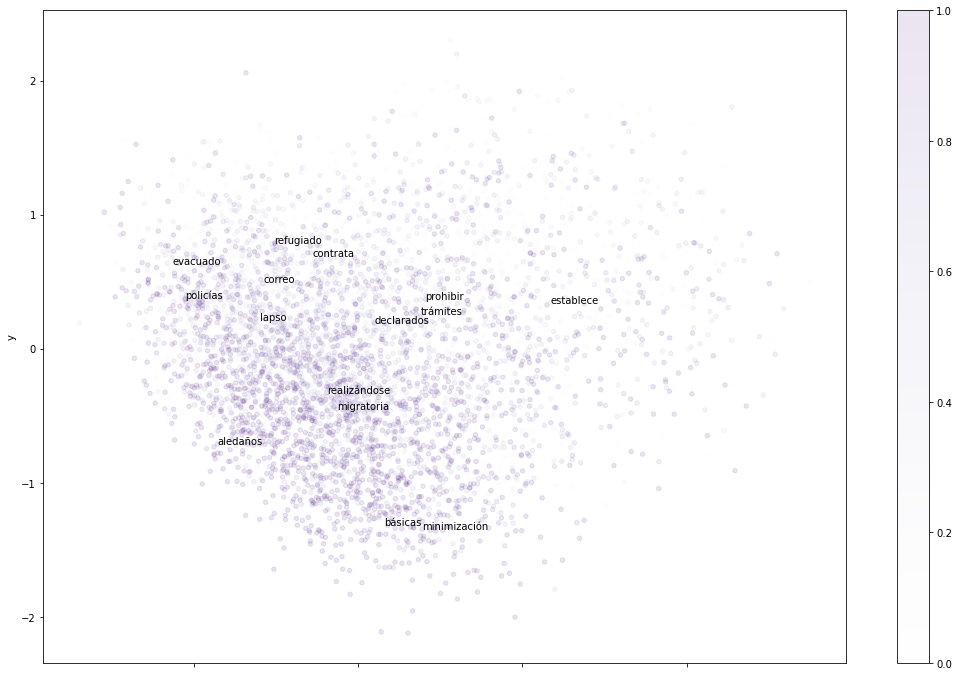

In [106]:
ax = pca_embeddings.plot(x='x', y='y', kind='scatter', figsize=(18, 12), color=freq_table[valid_words]['freq_next'], cmap='Purples', alpha=0.1)

for idx, row in pca_embeddings.sample(15).iterrows():
    ax.annotate(idx, row.values)


/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


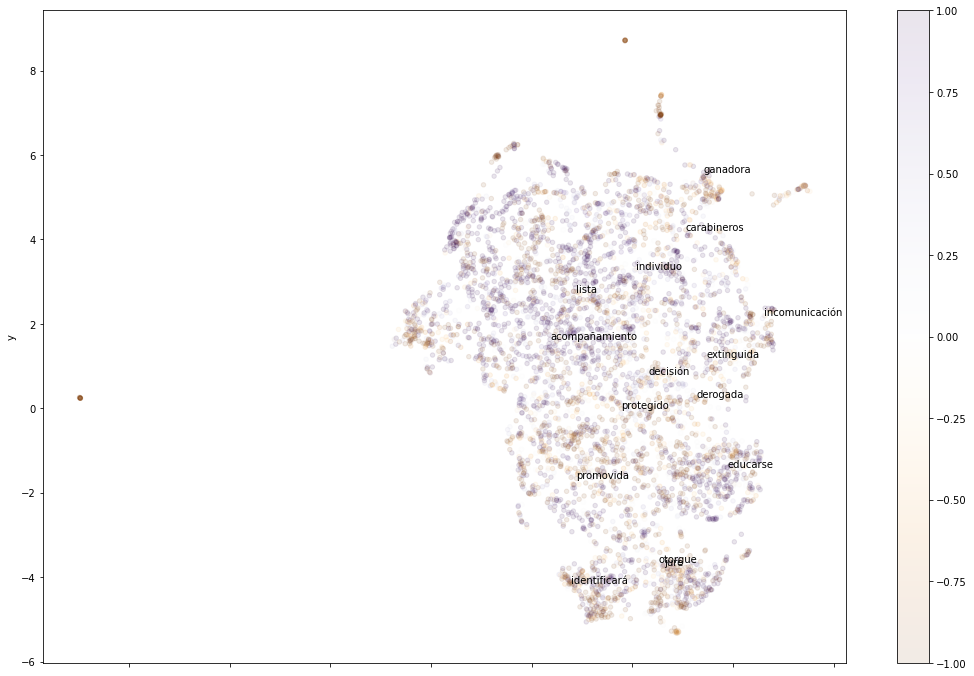

In [124]:
import umap

umap_embeddings = pd.DataFrame(
    umap.UMAP(
        n_components=2, n_neighbors=10, metric="cosine", random_state=2022
    ).fit_transform(PCA(n_components=100).fit_transform(embeddings)),
    index=embeddings.index,
    columns=["x", "y"],
)

ax = umap_embeddings.plot(
    x="x",
    y="y",
    kind="scatter",
    figsize=(18, 12),
    color=freq_table[valid_words]["tendency"],
    cmap="PuOr",
    alpha=0.1,
)

for idx, row in umap_embeddings.sample(15).iterrows():
    ax.annotate(idx, row.values)


In [125]:
import hdbscan

clusters = pd.Series(
    hdbscan.HDBSCAN(min_cluster_size=int(np.log(len(embeddings)))).fit_predict(
        umap_embeddings
    ),
    index=embeddings.index,
)
clusters.value_counts()


-1     1922
 20     287
 25     230
 17     101
 59      84
       ... 
 7        9
 4        8
 26       8
 28       8
 44       8
Length: 121, dtype: int64

In [126]:
clusters.value_counts() >= 50

-1      True
 20     True
 25     True
 17     True
 59     True
       ...  
 7     False
 4     False
 26    False
 28    False
 44    False
Length: 121, dtype: bool

In [127]:
cluster_counts = clusters.value_counts().drop(-1)
big_clusters = cluster_counts[cluster_counts >= 20].index
big_clusters

Int64Index([ 20,  25,  17,  59,  51, 111,  12, 104,  81,  62,  75, 100,   2,
             54,  37, 112, 105,  31,  79, 113,  53,  10, 119,  45,  90, 106,
            101,  55,  93, 103,  98,  76, 110,  97, 116,  72,  21, 117,  92,
             68,  73,  36,  16,  91, 109,  77,  64,  57,  18,  70,  48,  52,
             33, 115, 107,   3,  65,   5, 118,  96,  82],
           dtype='int64')

In [128]:
clustered_embeddings = umap_embeddings.assign(cluster=clusters).pipe(
    lambda x: x[x["cluster"].isin(big_clusters)]
)
clustered_embeddings


x         y  cluster
word                                        
abandono        10.958534  1.832223       12
abastecimiento   7.072779  3.557625       70
abogada         11.938313  3.789650       31
abogado         11.930475  3.736832       31
abogados        11.865667  3.817639       31
...                   ...       ...      ...
íntegro          9.816101  1.919488      101
ítem            10.569655  0.880064       59
ñ                8.526119  5.777063       10
ñuble            7.347141  5.960625        5
óptimas          9.084637  1.197614      115

[2530 rows x 3 columns]

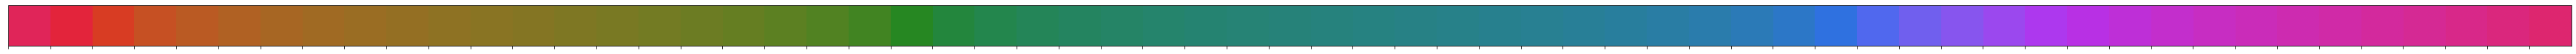

In [129]:
import seaborn as sns
cluster_colors = sns.husl_palette(n_colors=len(big_clusters), l=0.5)
sns.palplot(cluster_colors)

In [130]:
import alphashape
from descartes import PolygonPatch

/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


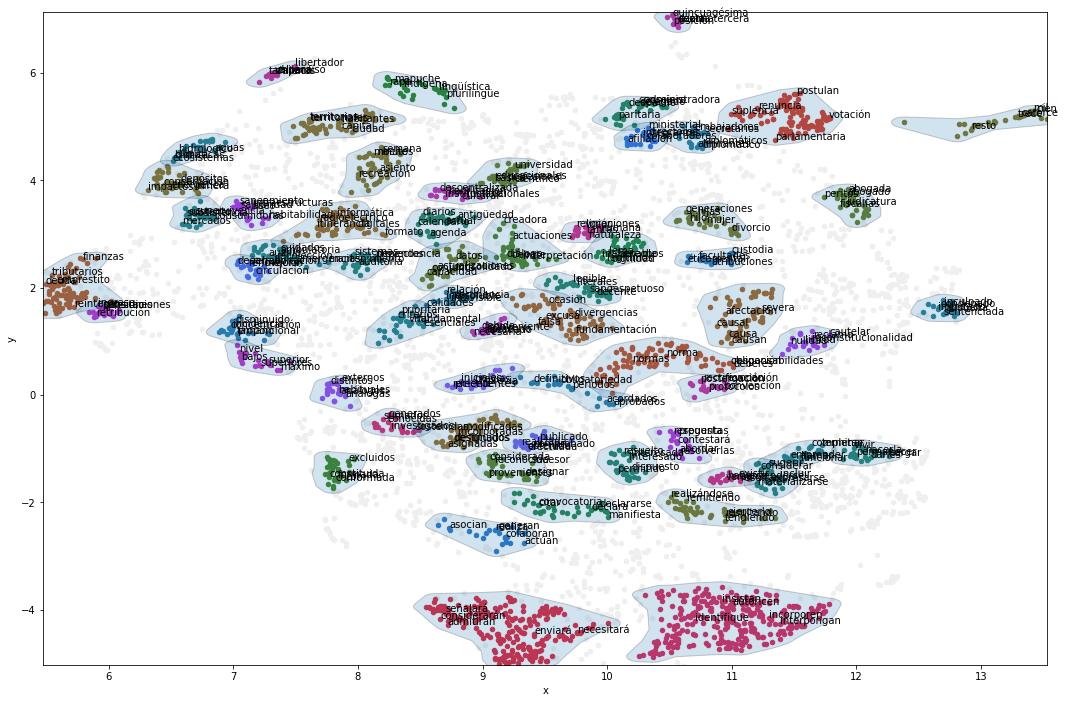

In [131]:
ax = umap_embeddings.plot(x='x', y='y', kind='scatter', figsize=(18, 12), color='#efefef')
ax.set_xlim(clustered_embeddings['x'].min(), clustered_embeddings['x'].max())
ax.set_ylim(clustered_embeddings['y'].min(), clustered_embeddings['y'].max())

for c_id, color in zip(big_clusters, cluster_colors):
    clustered = umap_embeddings.loc[clusters == c_id]
    #if clustered.empty or len(clustered) < 50:
    #    continue
    clustered.plot(x='x', y='y', kind='scatter', color=color, ax=ax)
    alpha_shape = alphashape.alphashape(clustered.values, 2.).buffer(0.1)
    ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
    for idx, row in clustered.sample(5).iterrows():
        ax.annotate(idx, row.values)

    #break



In [132]:
cluster_freqs = (
    freq_table.join(clusters.rename("cluster"), how="inner")
    .groupby("cluster")[["freq_prev", "freq_next"]]
    .sum()
    .pipe(normalize_rows)
    .assign(tendency=lambda x: x['freq_next'] - x['freq_prev'])
)

cluster_freqs


freq_prev  freq_next  tendency
cluster                                
-1        0.428981   0.571019  0.142038
 0        0.983333   0.016667 -0.966667
 1        0.945714   0.054286 -0.891429
 2        0.637915   0.362085 -0.275829
 3        0.902778   0.097222 -0.805556
...            ...        ...       ...
 115      0.272200   0.727800  0.455600
 116      0.316189   0.683811  0.367623
 117      0.223248   0.776752  0.553505
 118      0.199162   0.800838  0.601675
 119      0.397146   0.602854  0.205707

[121 rows x 3 columns]

In [133]:
cluster_freqs

freq_prev  freq_next  tendency
cluster                                
-1        0.428981   0.571019  0.142038
 0        0.983333   0.016667 -0.966667
 1        0.945714   0.054286 -0.891429
 2        0.637915   0.362085 -0.275829
 3        0.902778   0.097222 -0.805556
...            ...        ...       ...
 115      0.272200   0.727800  0.455600
 116      0.316189   0.683811  0.367623
 117      0.223248   0.776752  0.553505
 118      0.199162   0.800838  0.601675
 119      0.397146   0.602854  0.205707

[121 rows x 3 columns]

In [134]:
cluster_freqs['tendency'].describe()

count    121.000000
mean       0.099543
std        0.398295
min       -0.966667
25%       -0.185556
50%        0.111111
75%        0.379559
max        0.909091
Name: tendency, dtype: float64

In [135]:
cluster_freqs['bin'] = pd.cut(cluster_freqs['tendency'], bins=[-1, -0.1, 0.1, 1], labels=False)
cluster_freqs['bin']

cluster
-1      2
 0      0
 1      0
 2      0
 3      0
       ..
 115    2
 116    2
 117    2
 118    2
 119    2
Name: bin, Length: 121, dtype: int64

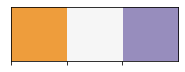

In [136]:
bin_colors = sns.color_palette('PuOr', n_colors=3)
sns.palplot(bin_colors)

In [137]:
import matplotlib.patheffects as path_effects
from aves.visualization.collections.labels import LabelCollection
from aves.visualization.colors import categorical_color_legend
import matplotlib.font_manager as font_manager

/home/egraells/miniconda3/envs/aves/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


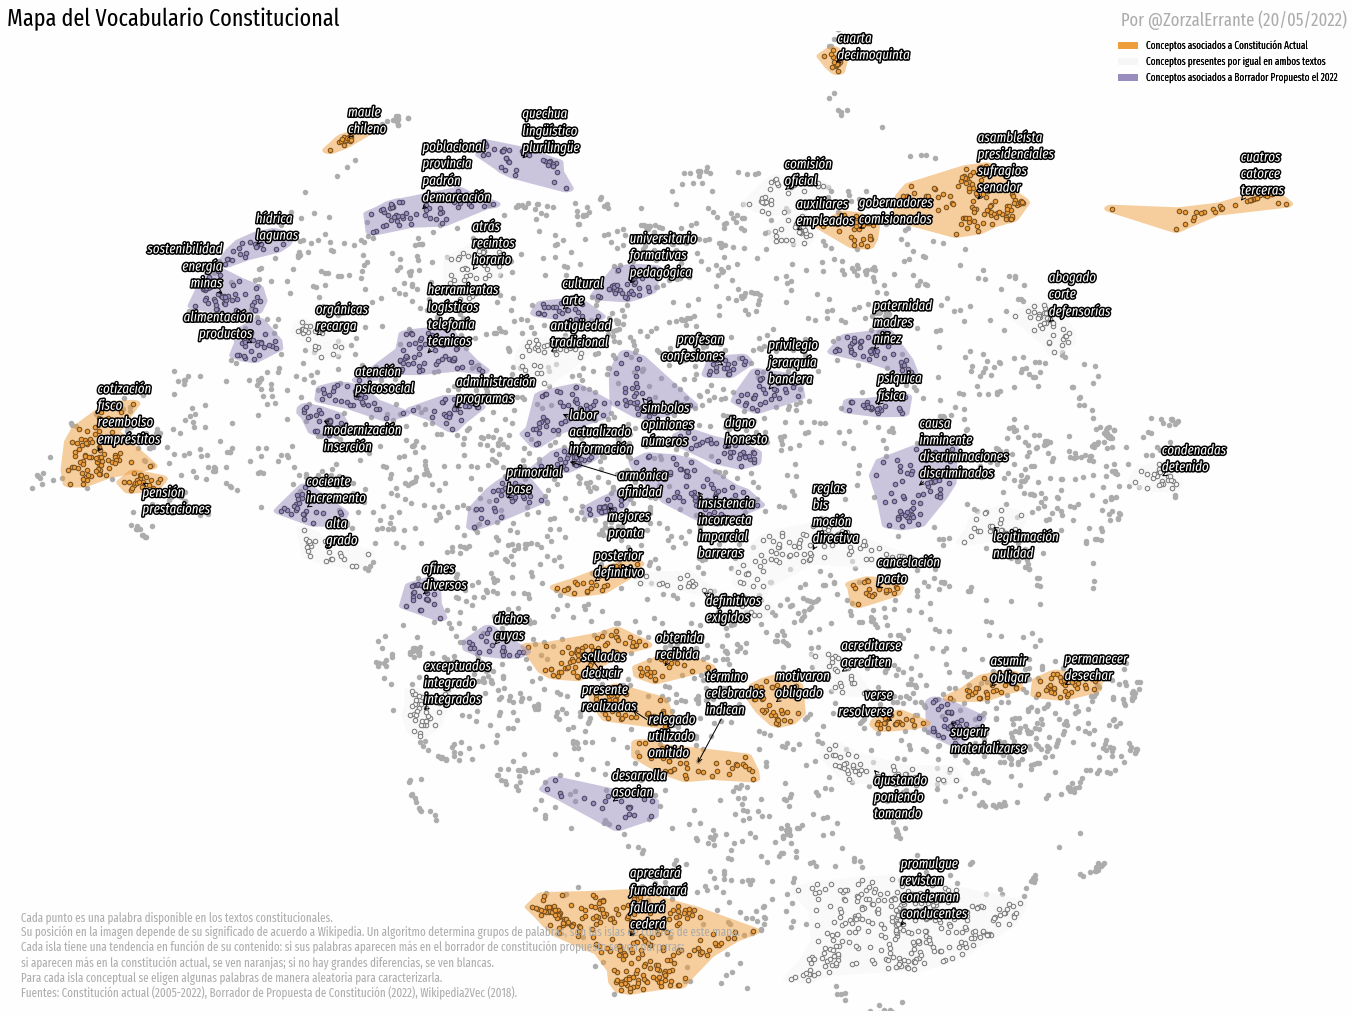

In [138]:
fig, ax = plt.subplots(figsize=(24, 18))

delta_x = 0.05 * (clustered_embeddings["x"].max() - clustered_embeddings["x"].min())
delta_y = 0.02 * (clustered_embeddings["y"].max() - clustered_embeddings["y"].min())

umap_embeddings.plot(
    x="x", y="y", kind="scatter", color="#abacab", ax=ax
)
ax.set_xlim(
    clustered_embeddings["x"].min() - delta_x, clustered_embeddings["x"].max() + delta_x
)
ax.set_ylim(
    clustered_embeddings["y"].min() - delta_y, clustered_embeddings["y"].max() + delta_y
)
ax.set_axis_off()
fig.set_facecolor('#fefefe')
ax.set_title('Mapa del Vocabulario Constitucional', fontname="Fira Sans Extra Condensed", fontsize=24, loc='left')
ax.set_title('Por @ZorzalErrante (20/05/2022)', fontname="Fira Sans Extra Condensed", fontsize=18, loc='right', color='#abacab')

collection = LabelCollection()

for c_id, color in zip(big_clusters, cluster_colors):
    clustered = umap_embeddings.loc[clusters == c_id]
    
    alpha_shape = alphashape.alphashape(clustered.values, 2.0).buffer(0.05)
    ax.add_patch(
        PolygonPatch(
            alpha_shape,
            alpha=0.5,
            facecolor=bin_colors[int(cluster_freqs.loc[c_id]["bin"])],
            edgecolor="none",
        )
    )

    clustered.plot(x="x", y="y", kind="scatter", color=bin_colors[int(cluster_freqs.loc[c_id]["bin"])], edgecolor='black', ax=ax)

    centroid = clustered.mean().values

    cluster_words = clustered.sample(frac=0.075).index.values
    cluster_words = cluster_words[: min(4, len(cluster_words))]
    collection.add_text("\n".join(cluster_words), centroid[0], centroid[1])

    # break

ax.annotate('''
Cada punto es una palabra disponible en los textos constitucionales.
Su posición en la imagen depende de su significado de acuerdo a Wikipedia. Un algoritmo determina grupos de palabras, son las islas de colores de este mapa.
Cada isla tiene una tendencia en función de su contenido: si sus palabras aparecen más en el borrador de constitución propuesto se ven púrpuras;
si aparecen más en la constitución actual, se ven naranjas; si no hay grandes diferencias, se ven blancas.
Para cada isla conceptual se eligen algunas palabras de manera aleatoria para caracterizarla.
Fuentes: Constitución actual (2005-2022), Borrador de Propuesta de Constitución (2022), Wikipedia2Vec (2018).
'''.strip(), (0.01, 0.01), xycoords='axes fraction', ha='left', va='bottom', fontname='Fira Sans Extra Condensed', fontsize=12, color='#abacab')

# fig.tight_layout()

collection.render(
    ax,
    avoid_collisions=True,
    color="white",
    fontsize=14,
    fontname="Fira Sans Extra Condensed",
    fontstyle='italic',
    outline_args={"linewidth": 3, "foreground": "black"},
    adjustment_args={"lim": 100, "arrowprops": dict(arrowstyle="->", color="black", lw=1)},
    outline=True,
)


font = font_manager.FontProperties(family='Fira Sans Extra Condensed',
                                   weight='normal',
                                   style='normal', size=10)

categorical_color_legend(ax, bin_colors, labels=['Conceptos asociados a Constitución Actual', 'Conceptos presentes por igual en ambos textos', 'Conceptos asociados a Borrador Propuesto el 2022'], loc='upper right', prop=font)

fig.savefig('conceptual_map.png', dpi=150, bbox_inches='tight')


In [139]:
list(clustered.index.values)

['acompañadas',
 'acumulados',
 'aisladas',
 'aplicados',
 'calificadas',
 'conocidas',
 'consideradas',
 'creadas',
 'cuidadas',
 'cuyas',
 'desarrolladas',
 'dichos',
 'generados',
 'identificados',
 'investigados',
 'ordenadas',
 'ordenados',
 'reconocidas',
 'sostenidas',
 'sumados']

In [141]:
for c_id, color in zip(big_clusters, cluster_colors):
    clustered = umap_embeddings.loc[clusters == c_id]
    most_similar = model.most_similar_cosmul(positive=list(clustered.index.values), topn=5)
    #most_similar = [m for m in most_similar if m[0].startswith('ENTITY')]
    print(c_id, int(cluster_freqs.loc[c_id]["bin"]), most_similar)
    #break

20 1 [('excluyan', 6.801944784786592e-40), ('apliquen', 2.347875576976231e-40), ('atengan', 7.130787495409697e-41), ('prevengan', 6.336811785523255e-41), ('prevean', 4.629049347050601e-41)]
25 0 [('gestionará', 1.2222784993635454e-29), ('orientarán', 8.889268836850424e-30), ('seleccionarán', 5.089727286405063e-30), ('completará', 2.9332718031549045e-30), ('presentarán', 2.7007614655905058e-30)]
17 0 [('comicios', 4.983319461834661e-14), ('reelecto', 3.638743427121331e-14), ('plurinominal', 1.238369283962544e-14), ('precandidatos', 1.0018836143197742e-14), ('legislaturas', 6.636469260419553e-15)]
59 1 [('reglamentaciones', 7.331472668542505e-13), ('disposi\xadciones', 1.6296282357407266e-13), ('reglamentan', 1.4278920927590644e-13), ('derogaciones', 1.2392402371202288e-13), ('reglamentación', 1.1865874493914574e-13)]
51 0 [('amortizaciones', 6.152055254116107e-11), ('desembolsos', 5.448679701869352e-11), ('amortización', 2.433982355942721e-11), ('devengados', 1.8496038034498952e-11), ('

In [ ]:
model.add_vectors()

In [143]:
list(clustered.index.values), model.doesnt_match(list(clustered.index.values))

(['acompañadas',
  'acumulados',
  'aisladas',
  'aplicados',
  'calificadas',
  'conocidas',
  'consideradas',
  'creadas',
  'cuidadas',
  'cuyas',
  'desarrolladas',
  'dichos',
  'generados',
  'identificados',
  'investigados',
  'ordenadas',
  'ordenados',
  'reconocidas',
  'sostenidas',
  'sumados'],
 'acumulados')